Практична №6</br>
    Задача Коші

x∈[0,1]</br>	
y'=f(x, y)</br>	
y(0)=y0</br>	


	
Реалізувати наближене розв'язування задачі Коші наступними чисельними методами:
	

		
Метод Ейлера</br>	
Метод Рунге-Кутта	</br>		
Метод Адамса Екстраполяціний		</br>	
Метод Адамса Інтерполяціний</br>	
	
<ul>
<li>Для багатокрокових методів за аппроксимацію розв'язку в початкових вузлах розбиття взяти значення з методу Ейлера або Рунге-Кутта.</li>
	
<li>Обчислити Евклідову норму розв'язку (np.linalg.norm), обчислити абсолютну різницю значень апроксимації розв'язку в точці x=1 між різними методами і точним значенням. За точне значення розв'язку можна взяти чисельний розв'язок знайдений таким же методом при вдвічі більшій кількості вузлів розбиття.</li>
	
<li>Порівняти точність та збіжність усіх реалізованих методів, зробити висновки</li>
</ul>



Метод Ейлера <br/>
Метод Рунге-Кутта порядок 3-А 4-В  <br/>
Метод Адамса Екстраполяційний порядок 3  <br/>
Метод Адамса Інтерполяційний порядок  4   <br/>


In [23]:
import numpy as np
from matplotlib import pyplot as plt

In [24]:
def f(x, y):
    return 2 * y + 10 * (3 * np.pi * np.cos(3 * np.pi * x) - 2 * np.sin(3 * np.pi * x))

def ytrue(x):
    return np.exp(2 * x) + 10 * np.sin(3 * np.pi * x)

y0 = 1
N = 41
x = np.linspace(0, 1, N)

<h1>Метод Ейлера</h1>

RMSE: 24.760272839009122
|D(xn)|: 8.443563673106219


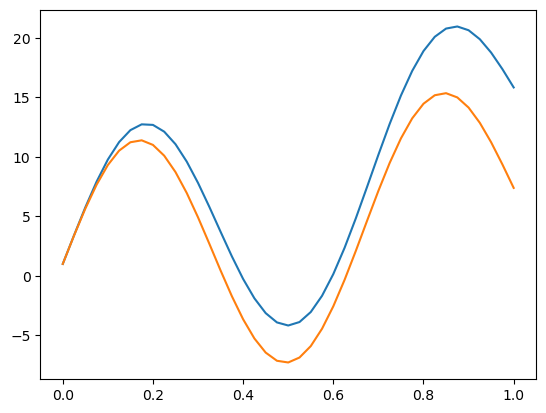

In [25]:
y = np.asarray([y0])
for x_prev, x_next in zip(x[0:-1], x[1:]):
    y_prev = y[-1]
    h = x_next - x_prev
    y_next = y_prev + h * f(x_prev, y_prev)
    y = np.append(y, y_next)

y_eul = y
print(f'RMSE: {np.linalg.norm(y_eul - ytrue(x))}')
print(f'|D(xn)|: {np.abs(y_eul[-1] - ytrue(x[-1]))}')
plt.plot(x, y_eul, label='y')
plt.plot(x, ytrue(x), label='y_true')

<h1>Метод Рунге-Кутта</h1>
<h5>порядок 3-А 4-В</h5>

порядок 3-А

$ y_{i+1} = y_i +\frac{1}{6}\cdot(k_1 +4\cdot{k_2} +k_3) $

$ k_1 =hf(x_i,y_i) $

$ k_2 = hf(x_i +\frac{1}{2}\cdot{h}, y_i + \frac{1}{2}\cdot{k_1}) $

$ k_3 = hf(x_i +h,y_i-k_1 +2\cdot{k_2}) $

порядок 4-В

$ y_{i+1} = y_i +\frac{1}{6}\cdot(k_1 +4\cdot{k_3} +k_4) $

$ k_1 =hf(x_i,y_i) $

$ k_2 = hf(x_i +\frac{1}{4}\cdot{h}, y_i + \frac{1}{4}\cdot{k_1}) $

$ k_3 = hf(x_i +\frac{1}{2}\cdot{h}, y_i + \frac{1}{2}\cdot{k_2}) $

$ k_4 = hf(x_i+h,y_i+k_1-2\cdot{k_2}+2\cdot{k_3}) $

***Порядок 3 </br>Формула А***

RMSE: 0.0050793001108382155
|D(xn)|: 0.0017428487577326734


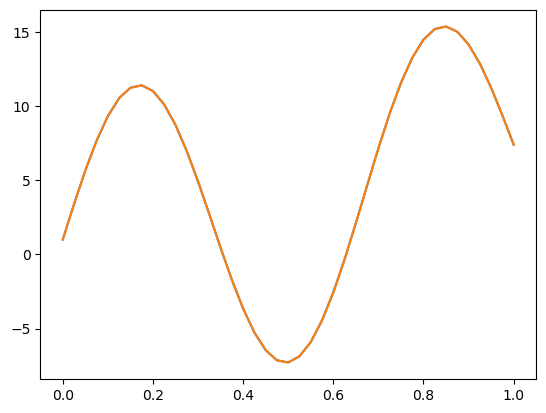

In [26]:
y = y_eul[:1]
for i in range(0, N-1):
    h = x[i+1] - x[i]
    k1 = h * f(x[i], y[i])
    k2 = h * f(x[i]+ h / 2, y[i] + k1 / 2)
    k3 = h * f(x[i]+ h, y[i] -k1+2*k2)
    y_next = y[i] + (1/6)*(k1+4*k2 +k3)
    y = np.append(y,y_next)

y_rk3 = y
print(f'RMSE: {np.linalg.norm(y_rk3 - ytrue(x))}')
print(f'|D(xn)|: {np.abs(y_rk3[-1] - ytrue(x[-1]))}')
plt.plot(x, y_rk3)
plt.plot(x, ytrue(x))

***Порядок 4 </br>Формула В***

RMSE: 0.00015328104086657075
|D(xn)|: 5.4773751076098165e-05


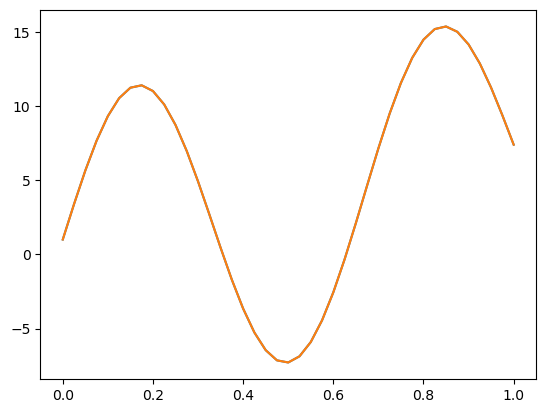

In [27]:
y = y_eul[:1]
for i in range(0, N-1):
    h = x[i+1] - x[i]
    k1 = h * f(x[i], y[i])
    k2 = h * f(x[i]+ h / 4, y[i] + k1 / 4)
    k3 = h * f(x[i]+ h / 2, y[i] + k2 / 2)
    k4 = h * f(x[i]+ h, y[i] +k1-2*k2+2*k3)

    y_next = y[i] + (1/6)*(k1+4*k3 +k4)

    y = np.append(y,y_next)

y_rk4 = y
print(f'RMSE: {np.linalg.norm(y_rk4 - ytrue(x))}')
print(f'|D(xn)|: {np.abs(y_rk4[-1] - ytrue(x[-1]))}')
plt.plot(x, y_rk4)
plt.plot(x, ytrue(x))

<h1>Метод Адамса</h1>




In [28]:
def finiteDifference(y):
    if len(y) > 1:
        fd = finiteDifference(np.diff(y))
        fd.append(y)
        return fd
    else:
        return [y]

<h3>Екстраполяційний</h3>

***порядок 3 ( m = 2 )***

$ y_{i+1} = y_i + h\cdot(f(x_i,y_i) + \frac{1}{2}\cdot\Delta f(x_{i-1},y_{i-1})+ \frac{5}{12}\cdot\Delta^2 f(x_{i-2},y_{i-2}))$


$ i = 2,3,... ,n-1  $

In [29]:
a1 = 1/2
a2 = 5/12



RMSE: 1.0396998882103463
|D(xn)|: 0.36280947956343557


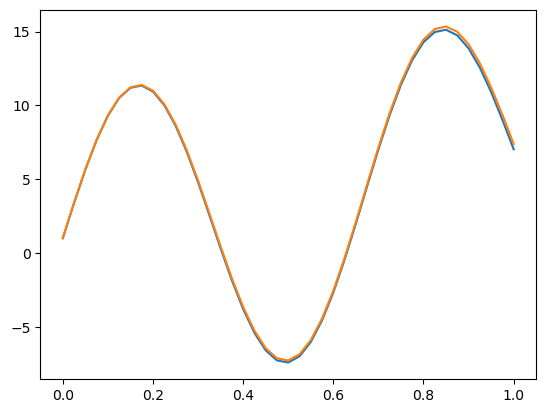

In [30]:
y = y_rk3[:3]
for i in range(2, N-1):
    h = x[i+1] - x[i]
    fd = finiteDifference(f(x[0:i+1], y))[::-1]
    y_next = y[i] + h * (fd[0][i] + a1 * fd[1][i-1] + a2 * fd[2][i-2])
    
    y = np.append(y,y_next)
    

y_ae3 = y
print(f'RMSE: {np.linalg.norm(y_ae3 - ytrue(x))}')
print(f'|D(xn)|: {np.abs(y_ae3[-1] - ytrue(x[-1]))}')
plt.plot(x, y_ae3)
plt.plot(x, ytrue(x))

<h3>Інтерполяційний</h3>

***порядок 4 ( m = 3 )***


$ y_{i+1} = y_i + h\cdot(f(x_{i+1},y_{i+1}) - \frac{1}{2}\cdot\Delta f(x_i,y_i) - \frac{1}{12}\cdot\Delta^2 f(x_{i-1},y_{i-1})- \frac{1}{24}\cdot\Delta^3 f(x_{i-2},y_{i-2})) $

$ i = 2,3,...,n-1 $

In [31]:
K = 10
ap1 = -1/2
ap2 = -1/12
ap3 = -1/24

RMSE: 0.0033542059339846
|D(xn)|: 4.249860504135228e-05


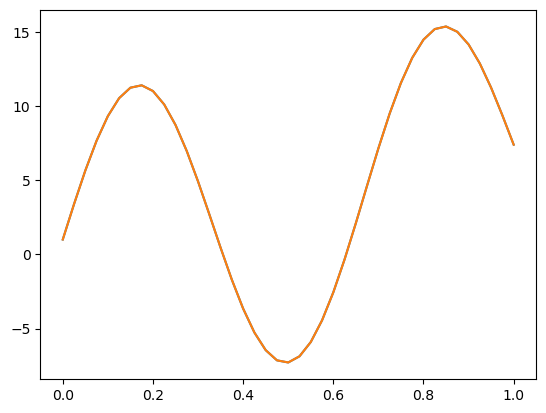

In [32]:
y = y_rk3[:3]
for i in range(2, N-1):
    h = x[i+1] - x[i]
    y = np.append(y, y[-1])
    # Simple iteration method
    for j in range(K):
        fd = finiteDifference(f(x[0:i+2], y))[::-1]
        y[i+1] = y[i] + h * (fd[0][i+1] + ap1 * fd[1][i]+ ap2 * fd[2][i-1]+ ap3 * fd[3][i-2])

y_ai4 = y
print(f'RMSE: {np.linalg.norm(y_ai4 - ytrue(x))}')
print(f'|D(xn)|: {np.abs(y_ai4[-1] - ytrue(x[-1]))}')
plt.plot(x, y_ai4)
plt.plot(x, ytrue(x))

<h1>Summary</h2>

In [33]:
print('Euler')
print(f'RMSE: {np.linalg.norm(y_eul - ytrue(x)):.6f}')
print(f'|D(xn)|: {np.abs(y_eul[-1] - ytrue(x[-1])):.6f}')
print('----------------------------')
print('Runge-Kutta')
print('A r=3')
print(f'RMSE: {np.linalg.norm(y_rk3 - ytrue(x)):.6f}')
print(f'|D(xn)|: {np.abs(y_rk3[-1] - ytrue(x[-1])):.6f}')
print('-------------')
print('Runge-Kutta')
print('B r=4')
print(f'RMSE: {np.linalg.norm(y_rk4 - ytrue(x)):.6f}')
print(f'|D(xn)|: {np.abs(y_rk4[-1] - ytrue(x[-1])):.6f}')
print('-------------')
print('Adams')
print('Extrapolation r=2')
print(f'RMSE: {np.linalg.norm(y_ae3 - ytrue(x)):.6f}')
print(f'|D(xn)|: {np.abs(y_ae3[-1] - ytrue(x[-1])):.6f}')
print('-------------')
print('Interpolation r=3')
print(f'RMSE: {np.linalg.norm(y_ai4 - ytrue(x)):.6f}')
print(f'|D(xn)|: {np.abs(y_ai4[-1] - ytrue(x[-1])):.6f}')
print('----------------------------')

Euler
RMSE: 24.760273
|D(xn)|: 8.443564
----------------------------
Runge-Kutta
A r=3
RMSE: 0.005079
|D(xn)|: 0.001743
-------------
Runge-Kutta
B r=4
RMSE: 0.000153
|D(xn)|: 0.000055
-------------
Adams
Extrapolation r=2
RMSE: 1.039700
|D(xn)|: 0.362809
-------------
Interpolation r=3
RMSE: 0.003354
|D(xn)|: 0.000042
----------------------------
